In [7]:
#!/usr/bin/python3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os
from pathlib import Path
from matplotlib.pyplot import figure, draw



#########################################################################
#   Configurações globais do grafico
plt.rcParams['axes.linewidth']=2
plt.rc('font', size=18)         # controls default text sizes
#########################################################################

#########################################################################
#   Configurações para salvar e plotar o grafico
BASE_PATH = os.getcwd()
PATH_SVG=BASE_PATH+"/../../../../inkscape/cap6/"
PATH_EPS=BASE_PATH+"/../../../../eps/cap6/"
fname = "CentralDifferenceLocal_Beam-Hexa8192"
fname_svg = PATH_SVG+fname+".svg"
fname_eps = PATH_EPS+fname+".eps"
PLOT_FIG = True
SAVE_FIG = False
#########################################################################



#   Leitura do csv para pandas
##### Resultado para CentralDifferenceLinear Local Method
# df = pd.read_csv('./data/cdl-linear_mpi-openmp.csv')
##### Resultado para CentralDifferenceLinear Local Method - Multiplicate Operations
df = pd.read_csv('./data/Results_VigaHexa8192_CDL_Linear.csv', sep=";")
pd.set_option('expand_frame_repr', False)
df

Number Ranks  Number Threads  P1 - Number Total Dofs  P1 - Median Total Dofs  P1 - CentralDifferenceLocal (Elapsed Time)  P1 - CGD (Elapsed Time)  P1 - Multiplicate (Elapsed Time)  P1 - Number Calls of Multiplicate  P1 - OpenMP Overhead Time P1 - OpenMP Overhead (%)  ... P4 - Multiplicate (Elapsed Time)  P4 - Number Calls of Multiplicate P4 - OpenMP Overhead Time P4 - OpenMP Overhead (%)  P4 - OpenMP Overhead Total (%)  P4 - MPI Overhead Time  P4 - MPI Overhead (%)  P4 - L2 cache misses  P4 - Memory Alloc (MB)  P4 - Memory Alloc (GB)
0              1               1                   31104                   31104                                  338.452195               290.813531                        280.094738                              41695                   0.000000                0.000000%  ...                     25317.666579                              26329                  0.000000                0.000000%                       0.000000%                0.000000                0.0000%                0.321%              13509.5547                 13.1929
1              1               2                   31104                   31104                                  288.786728               222.728963                        211.805434                              41694                   0.024362                0.005756%  ...                     12833.019819                              26329                  0.426675                0.001662%                       0.001982%                0.000000                0.0000%                0.328%              13575.5625                 13.2574
2              1               4                   31104                   31104                                  196.172484               113.938546                        105.537460                              41692                   0.055638                0.013218%  ...                      6637.633017                              26330                  0.679998                0.002561%                       0.004551%                0.000000                0.0000%                0.350%              13707.5703                 13.3863
3              1               8                   31104                   31104                                  175.743718                75.016786                         67.657460                              41693                   0.210516                0.039155%  ...                      3488.551166                              26330                  2.264045                0.008114%                       0.018966%                0.000000                0.0000%                0.352%              13971.5898                 13.6441
4              1              16                   31104                   31104                                  161.641592                46.902863                         39.481996                              41697                   0.715936                0.115445%  ...                      2002.282456                              26328                  9.568804                0.029886%                       0.087020%                0.000000                0.0000%                0.371%              14499.6289                 14.1598
5              1              32                   31104                   31104                                  176.688896                38.842433                         30.961197                              41696                   3.253309                0.341798%  ...                      1693.788030                              26329                 59.888164                0.111403%                       0.504478%                0.000000                0.0000%                0.314%              15555.6992                 15.1911
6              2               1                   31347                   15795                                  102.891983                79.293049                         71.280900             

In [10]:
df.columns

Index(['Number Ranks', 'Number Threads', 'P1 - Number Total Dofs',
       'P1 - Median Total Dofs', 'P1 - CentralDifferenceLocal (Elapsed Time)',
       'P1 - CGD (Elapsed Time)', 'P1 - Multiplicate (Elapsed Time)',
       'P1 - Number Calls of Multiplicate', 'P1 - OpenMP Overhead Time',
       'P1 - OpenMP Overhead (%)', 'P1 - OpenMP Overhead Total (%)',
       'P1 - MPI Overhead Time', 'P1 - MPI Overhead (%)',
       'P1 - L2 cache misses', 'P1 - Memory Alloc (MB)',
       'P1 - Memory Alloc (GB)', 'P2 - Number Total Dofs',
       'P2 - Median Total Dofs', 'P2 - CentralDifferenceLocal (Elapsed Time)',
       'P2 - CGD (Elapsed Time)', 'P2 - Multiplicate (Elapsed Time)',
       'P2 - Number Calls of Multiplicate', 'P2 - OpenMP Overhead Time',
       'P2 - OpenMP Overhead (%)', 'P2 - OpenMP Overhead Total (%)',
       'P2 - MPI Overhead Time', 'P2 - MPI Overhead (%)',
       'P2 - L2 cache misses', 'P2 - Memory Alloc (MB)',
       'P2 - Memory Alloc (GB)', 'P4 - Number Total Dofs',
   

In [14]:
#  Calculates the number of total processors
df["Nodes x Threads"] = df["Number Ranks"]*df["Number Threads"]

#   Calculate SpeedUp - CDL
df["SpeedUp P1 - CDL"] = df.iloc[0]["P1 - CentralDifferenceLocal (Elapsed Time)"]/df["P1 - CentralDifferenceLocal (Elapsed Time)"]
df["SpeedUp P2 - CDL"] = df.iloc[0]["P2 - CentralDifferenceLocal (Elapsed Time)"]/df["P2 - CentralDifferenceLocal (Elapsed Time)"]
df["SpeedUp P4 - CDL"] = df.iloc[0]["P4 - CentralDifferenceLocal (Elapsed Time)"]/df["P4 - CentralDifferenceLocal (Elapsed Time)"]

#   Calculate SpeedUp - Multiplicate
df["SpeedUp P1 - Multiplicate"] = df.iloc[0]["P1 - Multiplicate (Elapsed Time)"]/df["P1 - Multiplicate (Elapsed Time)"]
df["SpeedUp P2 - Multiplicate"] = df.iloc[0]["P2 - Multiplicate (Elapsed Time)"]/df["P2 - Multiplicate (Elapsed Time)"]
df["SpeedUp P4 - Multiplicate"] = df.iloc[0]["P4 - Multiplicate (Elapsed Time)"]/df["P4 - Multiplicate (Elapsed Time)"]

#   Calculate Efficiency - CDL
df["Efficiency P1 - CDL"] = df["SpeedUp P1 - CDL"]/df["Nodes x Threads"]
df["Efficiency P2 - CDL"] = df["SpeedUp P2 - CDL"]/df["Nodes x Threads"]
df["Efficiency P4 - CDL"] = df["SpeedUp P4 - CDL"]/df["Nodes x Threads"]

#   Calculate Efficiency - Multiplicate
df["Efficiency P1 - Multiplicate"] = df["SpeedUp P1 - Multiplicate"]/df["Nodes x Threads"]
df["Efficiency P2 - Multiplicate"] = df["SpeedUp P2 - Multiplicate"]/df["Nodes x Threads"]
df["Efficiency P4 - Multiplicate"] = df["SpeedUp P4 - Multiplicate"]/df["Nodes x Threads"]

# #   Calculate SpeedUp - NotSequential
# df["SpeedUp P1 - NotSequential"] = df.iloc[0]["P1 - NotSequential - Runtime (s)"]/df["P1 - NotSequential - Runtime (s)"]
# df["SpeedUp P4 - NotSequential"] = df.iloc[0]["P4 - NotSequential - Runtime (s)"]/df["P4 - NotSequential - Runtime (s)"]
# df["SpeedUp P6 - NotSequential"] = df.iloc[0]["P6 - NotSequential - Runtime (s)"]/df["P6 - NotSequential - Runtime (s)"]
# df["SpeedUp P9 - NotSequential"] = df.iloc[0]["P9 - NotSequential - Runtime (s)"]/df["P9 - NotSequential - Runtime (s)"]

# #   Calculate Efficiency - ClockCounterWise
# df["Efficiency P1 - ClockCounterWise"] = df["SpeedUp P1 - ClockCounterWise"]/df["Num. Nodes"]
# df["Efficiency P4 - ClockCounterWise"] = df["SpeedUp P4 - ClockCounterWise"]/df["Num. Nodes"]
# df["Efficiency P6 - ClockCounterWise"] = df["SpeedUp P6 - ClockCounterWise"]/df["Num. Nodes"]
# df["Efficiency P9 - ClockCounterWise"] = df["SpeedUp P9 - ClockCounterWise"]/df["Num. Nodes"]

# #   Calculate Efficiency - NotSequential
# df["Efficiency P1 - NotSequential"] = df["SpeedUp P1 - NotSequential"]/df["Num. Nodes"]
# df["Efficiency P4 - NotSequential"] = df["SpeedUp P4 - NotSequential"]/df["Num. Nodes"]
# df["Efficiency P6 - NotSequential"] = df["SpeedUp P6 - NotSequential"]/df["Num. Nodes"]
# df["Efficiency P9 - NotSequential"] = df["SpeedUp P9 - NotSequential"]/df["Num. Nodes"]
df

Number Ranks  Number Threads  P1 - Number Total Dofs  P1 - Median Total Dofs  P1 - CentralDifferenceLocal (Elapsed Time)  P1 - CGD (Elapsed Time)  P1 - Multiplicate (Elapsed Time)  P1 - Number Calls of Multiplicate  P1 - OpenMP Overhead Time P1 - OpenMP Overhead (%)  ... SpeedUp P1 - Multiplicate  SpeedUp P2 - Multiplicate SpeedUp P4 - Multiplicate Nodes x Threads  Efficiency P1 - CDL  Efficiency P2 - CDL  Efficiency P4 - CDL  Efficiency P1 - Multiplicate  Efficiency P2 - Multiplicate  Efficiency P4 - Multiplicate
0              1               1                   31104                   31104                                  338.452195               290.813531                        280.094738                              41695                   0.000000                0.000000%  ...                  1.000000                   1.000000                  1.000000               1             1.000000             1.000000             1.000000                      1.000000                      1.000000                      1.000000
1              1               2                   31104                   31104                                  288.786728               222.728963                        211.805434                              41694                   0.024362                0.005756%  ...                  1.322415                   1.877765                  1.972853               2             0.585990             0.763704             0.784153                      0.661208                      0.938882                      0.986427
2              1               4                   31104                   31104                                  196.172484               113.938546                        105.537460                              41692                   0.055638                0.013218%  ...                  2.653984                   3.690493                  3.814261               4             0.431320             0.554706             0.564828                      0.663496                      0.922623                      0.953565
3              1               8                   31104                   31104                                  175.743718                75.016786                         67.657460                              41693                   0.210516                0.039155%  ...                  4.139894                   6.164585                  7.257359               8             0.240729             0.336508             0.353515                      0.517487                      0.770573                      0.907170
4              1              16                   31104                   31104                                  161.641592                46.902863                         39.481996                              41697                   0.715936                0.115445%  ...                  7.094240                  10.637083                 12.644403              16             0.130865             0.183741             0.191891                      0.443390                      0.664818                      0.790275
5              1              32                   31104                   31104                                  176.688896                38.842433                         30.961197                              41696                   3.253309                0.341798%  ...                  9.046638                  12.551550                 14.947364              32             0.059860             0.085907             0.088872                      0.282707                      0.392236                      0.467105
6              2               1                   31347                   15795                                  102.891983                79.293049                         71.280900                              20056                   0.000000                0.000000%  ...                  3.929450                   3.963466        

In [7]:
# print(df.columns)
aggregate_operations = {
    'SpeedUp P1 - ClockCounterWise':'max',
    'SpeedUp P4 - ClockCounterWise':'max',
    'SpeedUp P6 - ClockCounterWise':'max',
    'SpeedUp P9 - ClockCounterWise':'max',
    'SpeedUp P1 - NotSequential':'max',
    'SpeedUp P4 - NotSequential':'max',
    'SpeedUp P6 - NotSequential':'max',
    'SpeedUp P9 - NotSequential':'max'
}
df = df.groupby(['Num. Nodes'], as_index=False).agg(aggregate_operations)
df["Ideal Speedup"] = df["Num. Nodes"]
df.columns

Index(['Num. Nodes', 'SpeedUp P1 - ClockCounterWise',
       'SpeedUp P4 - ClockCounterWise', 'SpeedUp P6 - ClockCounterWise',
       'SpeedUp P9 - ClockCounterWise', 'SpeedUp P1 - NotSequential',
       'SpeedUp P4 - NotSequential', 'SpeedUp P6 - NotSequential',
       'SpeedUp P9 - NotSequential', 'Ideal Speedup'],
      dtype='object')

In [72]:
# fig = plt.subplots()
fig = plt.figure(figsize=(10,10))
color='tab:blue'
#   Plotar os valores dos graficos para P1 e P4.
plt.plot(df['Num. Nodes'], df['SpeedUp P1 - ClockCounterWise'], marker='s', markersize=14, color='forestgreen', linewidth=5)
plt.plot(df['Num. Nodes'], df['SpeedUp P4 - ClockCounterWise'], marker='s', markersize=14, color='cyan', linewidth=5)
plt.plot(df['Num. Nodes'], df['SpeedUp P1 - NotSequential'], marker='.', markersize=14, color='orange', linewidth=2)
plt.plot(df['Num. Nodes'], df['SpeedUp P4 - NotSequential'], marker='.', markersize=14, color='darkblue', linewidth=2)
plt.plot(df['Num. Nodes'], df['Ideal Speedup'], marker='_', markersize=14, color='dimgrey', linewidth=2)
#   Define a escala do grafico
# plt.xscale('log', basex=2)
# plt.yscale('log', basey=2)
plt.xticks([1, 16, 32, 64, 128, 256, 512], [1, 16, 32, 64, 128, 256, 512], rotation=90)
plt.yticks([1, 16, 32, 64, 100, 128, 150, 200, 256, 300, 350, 400, 450, 512], [1, 16, 32, 64, 100, 128, 150, 200, 256, 300, 350, 400, 450, 512])

lines = [1, 16, 32, 64, 100, 128, 150, 200, 256, 300, 350, 400, 450, 512]
for i in lines:
    plt.axhline(i, linestyle='--', color='darkblue', linewidth='1.2') 


#   Plota os labels
plt.tight_layout()
title = 'Projection Solver - 10000 Square'
subtitle = 'ClockCounterWise Vs NotSequential Algorithms - Speedup\n'
plt.suptitle(title, y=0.97, fontsize=20, fontweight='bold', ha='center', va='center')
plt.title(subtitle, x=0.48, fontsize=16, ha='center', va='center')
plt.subplots_adjust(top=0.92)
color='tab:blue'
plt.xlabel('Number of Procs - MPI', fontweight='bold')
plt.ylabel('Speedup', fontweight='bold', color=color)
#   Plota a legenda e o tamanho da figura
plt.legend(loc=(0.05, .72), frameon = True)
plt.grid()
plt.show()

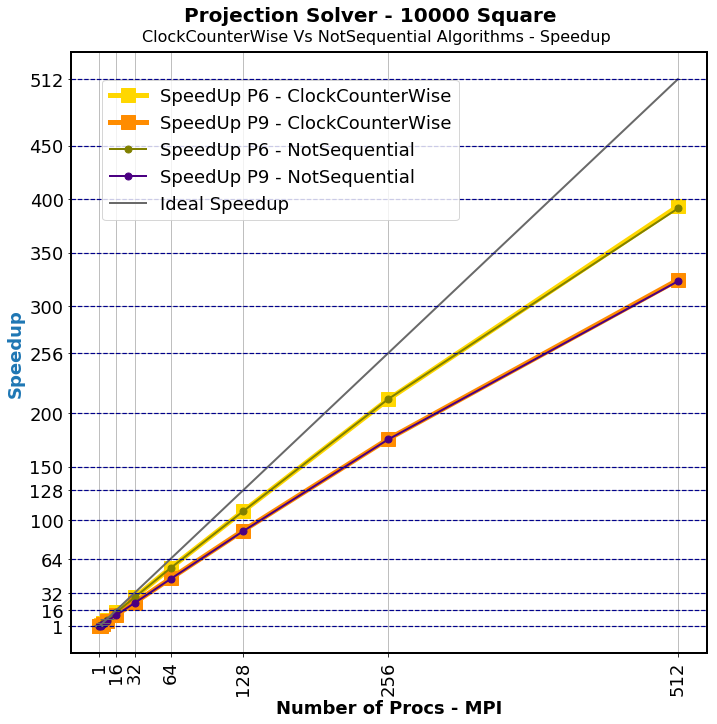

In [71]:
# fig = plt.subplots()
fig2 = plt.figure(figsize=(10,10))
color='tab:blue'
#   Plotar os valores dos graficos para P6 e P9
plt.plot(df['Num. Nodes'], df['SpeedUp P6 - ClockCounterWise'], marker='s', markersize=14, color='gold', linewidth=5)
plt.plot(df['Num. Nodes'], df['SpeedUp P9 - ClockCounterWise'], marker='s', markersize=14, color='darkorange', linewidth=5)
plt.plot(df['Num. Nodes'], df['SpeedUp P6 - NotSequential'], marker='.', markersize=14, color='olive', linewidth=2)
plt.plot(df['Num. Nodes'], df['SpeedUp P9 - NotSequential'], marker='.', markersize=14, color='indigo', linewidth=2)
plt.plot(df['Num. Nodes'], df['Ideal Speedup'], marker='_', markersize=14, color='dimgrey', linewidth=2)
#   Define a escala do grafico
# plt.xscale('log', basex=2)
# plt.yscale('log', basey=2)
plt.xticks([1, 16, 32, 64, 128, 256, 512], [1, 16, 32, 64, 128, 256, 512], rotation=90)
plt.yticks([1, 16, 32, 64, 100, 128, 150, 200, 256, 300, 350, 400, 450, 512], [1, 16, 32, 64, 100, 128, 150, 200, 256, 300, 350, 400, 450, 512])

lines = [1, 16, 32, 64, 100, 128, 150, 200, 256, 300, 350, 400, 450, 512]
for i in lines:
    plt.axhline(i, linestyle='--', color='darkblue', linewidth='1.2') 


#   Plota os labels
plt.tight_layout()
title = 'Projection Solver - 10000 Square'
subtitle = 'ClockCounterWise Vs NotSequential Algorithms - Speedup\n'
plt.suptitle(title, y=0.97, fontsize=20, fontweight='bold', ha='center', va='center')
plt.title(subtitle, x=0.48, fontsize=16, ha='center', va='center')
plt.subplots_adjust(top=0.92)
color='tab:blue'
plt.xlabel('Number of Procs - MPI', fontweight='bold')
plt.ylabel('Speedup', fontweight='bold', color=color)
#   Plota a legenda e o tamanho da figura
plt.legend(loc=(0.05, .72), frameon = True)
plt.grid()
plt.show()